In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_profiling as pp
import seaborn as sb
sb.set()

In [2]:
data = pd.read_csv("medals.csv", encoding = 'unicode_escape')

In [3]:
data.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [4]:
data["Age"][data["Age"]==30].count() + data["Age"][data["Age"]==31].count()

804

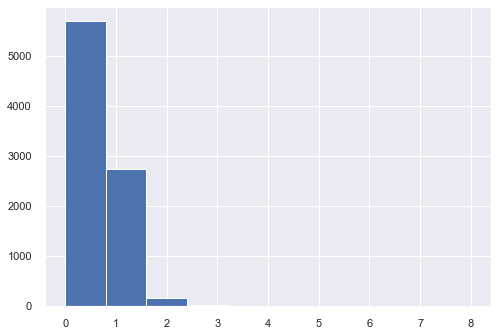

In [39]:
data["Gold Medals"].dropna().hist()

In [15]:
data.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [4]:
data.dropna().describe()

,Age,Year,Gold Medals,Silver Medals,Bronze Medals,Total Medals
count,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000
mean,26.405434,2005.975386,0.364914,0.362940,0.377917,1.105770
std,5.102118,4.288737,0.545436,0.511531,0.505069,0.409003
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000


col_0,Numero de Atletas
Age,
15.0,18
16.0,60
17.0,76
18.0,129
19.0,222
20.0,329
21.0,458
22.0,644
23.0,691


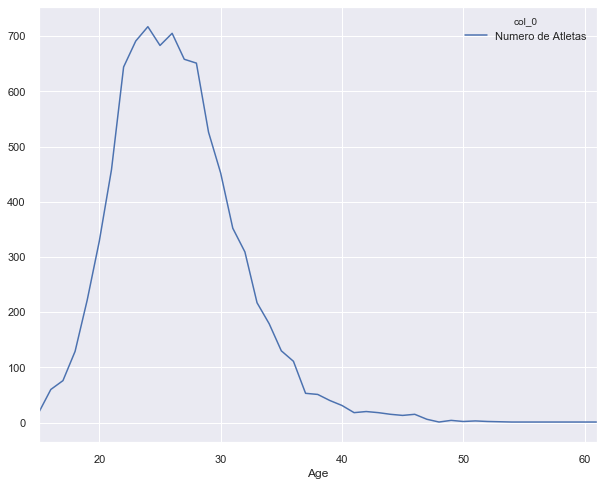

In [46]:
#PARTICIPANTES POR EDAD

año = pd.crosstab(index= data["Age"], columns="Numero de Atletas")

año.plot(figsize=(10,8))
año

col_0,Atletas participantes
Year,
2000,408
2002,120
2004,441
2006,147
2008,419
2010,135
2012,376
All,2046


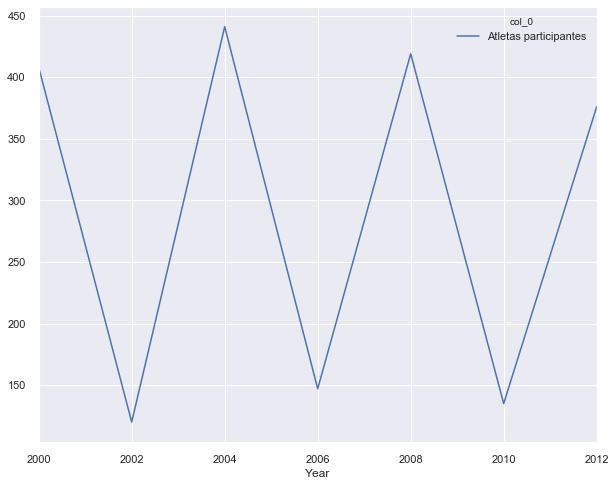

In [33]:
#NUMERO DE ATLETAS DE 30 AÑOS O MÁS DE CADA JUEGOS OLÍMPICOS

data30= data[data["Age"]>=30]
pd.crosstab(index=data30["Year"], columns="Atletas participantes").plot(figsize=(10,8))
pd.crosstab(index=data30["Year"], columns="Atletas participantes", margins=True).drop("All",axis=1)


In [43]:
#TOTAL DE MEDALLAS GANADAS POR CADA ATLETA 

totalm = data.pivot_table(['Gold Medals', 'Silver Medals', 'Bronze Medals', 'Total Medals'], index='Athlete',
                 aggfunc={"Gold Medals":sum, "Silver Medals":sum, "Bronze Medals": sum, "Total Medals": sum}).sort_values("Total Medals", ascending=False)
totalm

,Bronze Medals,Gold Medals,Silver Medals,Total Medals
Athlete,,,,
Michael Phelps,2,18,2,22
Natalie Coughlin,5,3,4,12
Ryan Lochte,3,5,3,11
Leisel Jones,1,3,5,9
Ole Einar Bjørndalen,1,5,3,9
Ian Thorpe,1,5,3,9
Dara Torres,3,2,3,8
Jason Lezak,2,4,2,8
Apolo Anton Ohno,4,2,2,8


col_0,Numero de atletas
Total Medals,
1,5290
2,1150
3,319
4,113
5,34
6,23
7,15
8,5
9,3


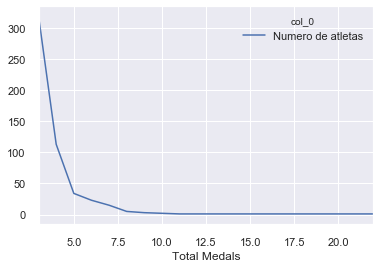

In [59]:
#TENDENCIA DE TOTAL DE MEDALLAS GANADAS

pd.crosstab(totalm["Total Medals"], "Numero de atletas").iloc[2:].plot()
pd.crosstab(totalm["Total Medals"], "Numero de atletas")

Gold Medals,0,1,2,3,4,5,6,18
col_0,,,,,,,,
Numero de atletas,4489,1983,357,84,31,8,2,1


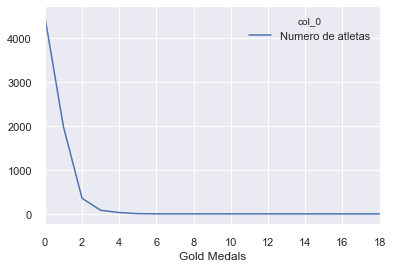

In [68]:
#TENDENCIA DE TOTAL DE MEDALLAS DE ORO GANADAS

pd.crosstab(totalm["Gold Medals"], "Numero de atletas").plot()
pd.crosstab(totalm["Gold Medals"], "Numero de atletas").T

Silver Medals,0,1,2,3,4,5
col_0,,,,,,
Numero de atletas,4197,2453,254,41,8,2


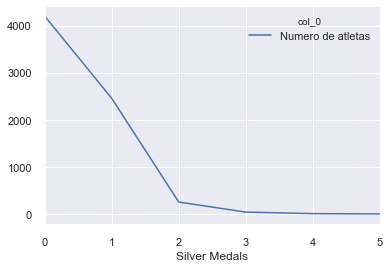

In [69]:
#TENDENCIA DE TOTAL DE MEDALLAS DE PLATA GANADAS

pd.crosstab(totalm["Silver Medals"], "Numero de atletas").plot()
pd.crosstab(totalm["Silver Medals"], "Numero de atletas").T

Bronze Medals,0,1,2,3,4,5
col_0,,,,,,
Numero de atletas,3993,2699,238,21,3,1


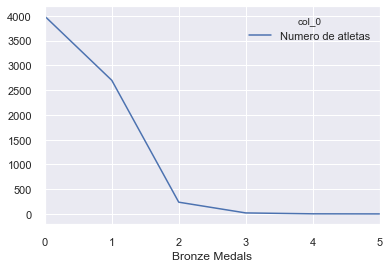

In [71]:
#TENDENCIA DE TOTAL DE MEDALLAS DE BRONCE GANADAS

pd.crosstab(totalm["Bronze Medals"], "Numero de atletas").plot()
pd.crosstab(totalm["Bronze Medals"], "Numero de atletas").T